In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime

In [21]:
data = pd.read_csv('Causal/30sec.csv')

In [22]:
date = data["timestamp"]
date
start = datetime.strptime(date[0],'%Y-%m-%d|%H:%M:%S.%f')
timestamps = []
for i in date:
    timestamps.append( (datetime.strptime(i,'%Y-%m-%d|%H:%M:%S.%f') - start).total_seconds() )

timestamps

[0.0,
 0.203,
 0.406,
 0.608,
 0.811,
 1.014,
 1.218,
 1.422,
 1.639,
 1.864,
 2.068,
 2.273,
 2.476,
 2.679,
 2.883,
 3.082,
 3.284,
 3.487,
 3.688,
 3.891,
 4.094,
 4.296,
 4.499,
 4.699,
 4.903,
 5.105,
 5.306,
 5.509,
 5.711,
 5.915,
 6.118,
 6.324,
 6.527,
 6.729,
 6.931,
 7.135,
 7.337,
 7.538,
 7.742,
 7.947,
 8.15,
 8.351,
 8.554,
 8.759,
 8.962,
 9.164,
 9.368,
 9.57,
 9.77,
 9.974,
 10.176,
 10.378,
 10.582,
 10.785,
 10.987,
 11.189,
 11.392,
 11.595,
 11.797,
 11.999,
 12.2,
 12.402,
 12.605,
 12.807,
 13.008,
 13.209,
 13.412,
 13.613,
 13.817,
 14.017,
 14.235,
 14.438,
 14.642,
 14.844,
 15.046,
 15.25,
 15.452,
 15.656,
 15.857,
 16.058,
 16.26,
 16.462,
 16.666,
 16.868,
 17.071,
 17.273,
 17.477,
 17.678,
 17.88,
 18.084,
 18.301,
 18.502,
 18.707,
 18.906,
 19.11,
 19.315,
 19.519,
 19.72,
 19.921,
 20.125,
 20.327,
 20.546,
 20.75,
 20.953,
 21.155,
 21.358,
 21.562,
 21.763,
 21.967,
 22.168,
 22.371,
 22.572,
 22.772,
 22.975,
 23.176,
 23.378,
 23.58,
 23.782,
 2

In [23]:
engagement = []
alpha = data["alpha"].to_numpy()
beta = data["beta"].to_numpy()
theta = data["theta"].to_numpy()
difficulty = data["diff"].to_numpy()

def transform(x):
    return (((x + 1) * (100)) / (2))

# (((alpha_ + 1) * (100)) / (2))

alpha_ = (((alpha + 1) * (100)) / (2))
beta_ = (((beta + 1) * (100)) / (2))
theta_ = (((theta + 1) * (100)) / (2))

engagement = beta_ / (alpha_ + theta_)

In [24]:
index_diff_change = []

for i in range(1, int(difficulty[-1])+1):
    index_diff_change.append(np.where(difficulty == i)[0][0])

time_diff_change = [timestamps[i] for i in index_diff_change]
time_diff_change

[209.357,
 239.265,
 269.334,
 299.211,
 329.291,
 359.39,
 389.353,
 419.317,
 449.464,
 479.391]

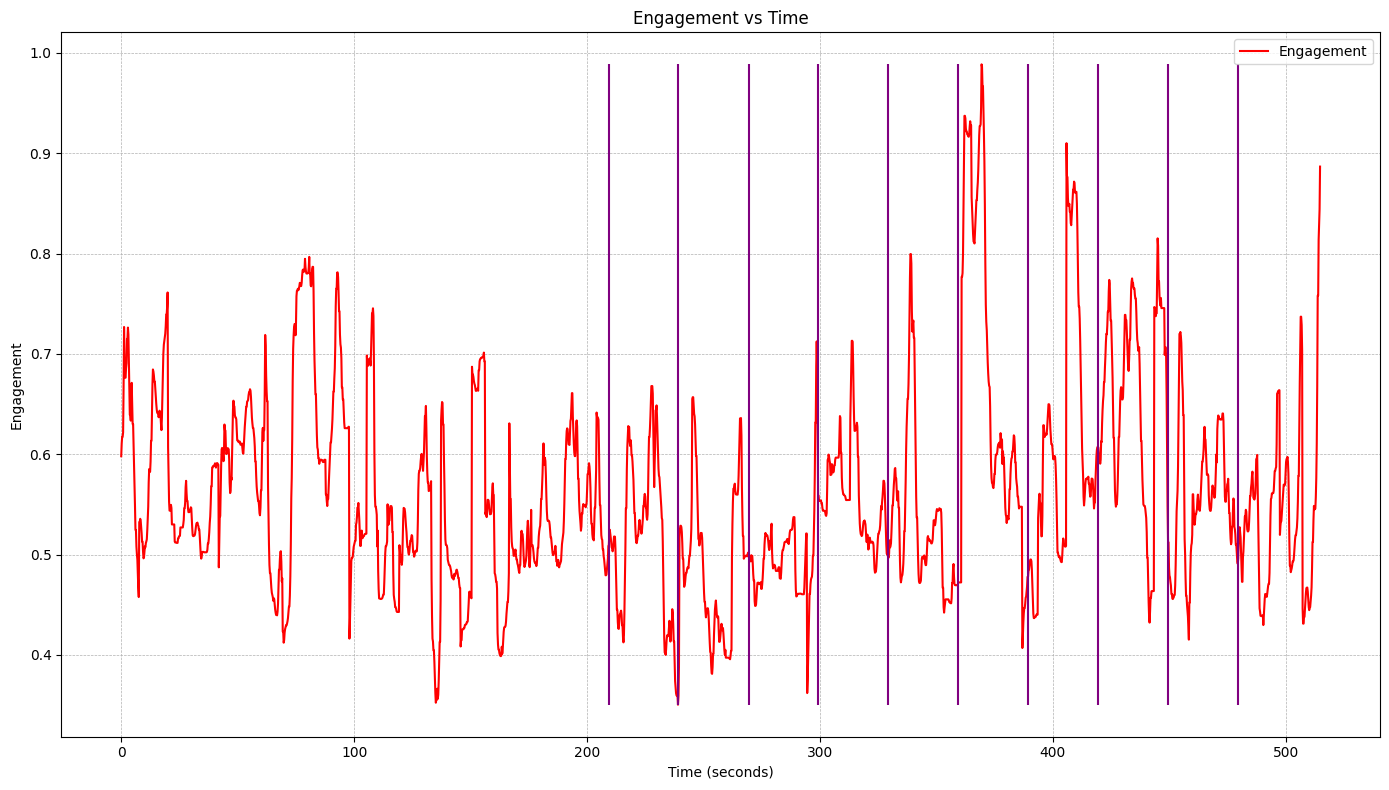

In [25]:
plt.figure(figsize=(14,8))
plt.plot(timestamps, engagement, color = "r", label = "Engagement")
plt.vlines(x = time_diff_change, ymin = min(engagement), ymax = max(engagement),
           colors="purple")

plt.title("Engagement vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Engagement")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [26]:
eng_blocks = []

for i in range(len(index_diff_change)+1):
    sum = 0
    deltat = 0
    avg = 0

    if i == 0:
        sum = np.sum(engagement[0:index_diff_change[i]])
        deltat = time_diff_change[0]
        avg = np.mean(engagement[0:index_diff_change[i]])
    elif i == len(index_diff_change):
        sum = np.sum(engagement[index_diff_change[i-1]:])
        deltat = timestamps[-1] - time_diff_change[i-1]
        avg = np.mean(engagement[index_diff_change[i-1]:])
    else:
        sum = np.sum(engagement[index_diff_change[i-1]:index_diff_change[i]])
        deltat = time_diff_change[i] - time_diff_change[i-1]
        avg = np.mean(engagement[index_diff_change[i-1]:index_diff_change[i]])

    print(i)
    # avg = sum / deltat
    # avg = np.mean(sum)
    eng_blocks.append(avg)

print(eng_blocks)


0
1
2
3
4
5
6
7
8
9
10
[np.float64(0.5615346042942281), np.float64(0.5141900501469182), np.float64(0.488850103600199), np.float64(0.4959239076699019), np.float64(0.5606340349707718), np.float64(0.5328489450127915), np.float64(0.6778677923841224), np.float64(0.6089402405865372), np.float64(0.6584074075784769), np.float64(0.5558196950128838), np.float64(0.5405288722805264)]


Text(0, 0.5, 'Engagement')

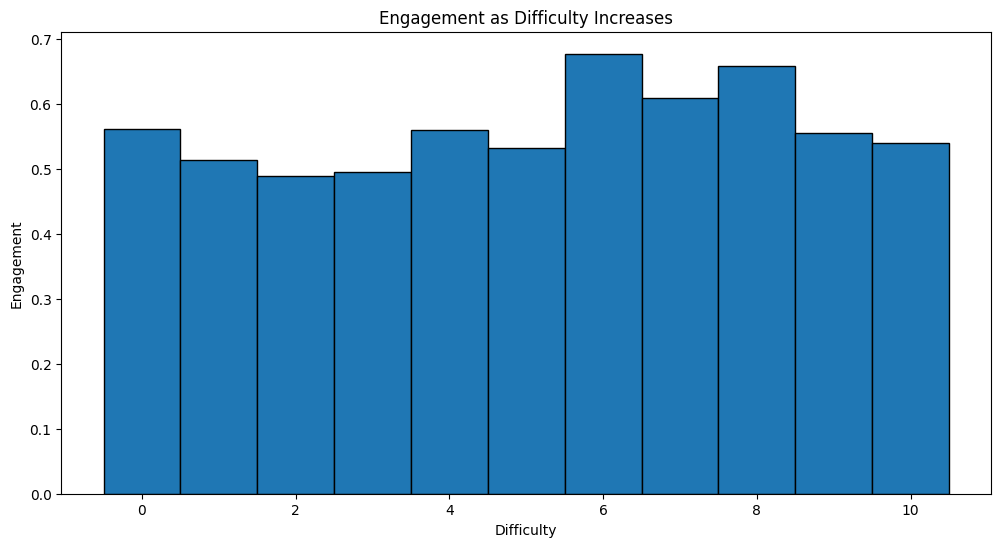

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(index_diff_change)+1)
rects1 = ax.bar(x, eng_blocks, 1, edgecolor = "black")
plt.title("Engagement as Difficulty Increases")
plt.xlabel("Difficulty")
plt.ylabel("Engagement")

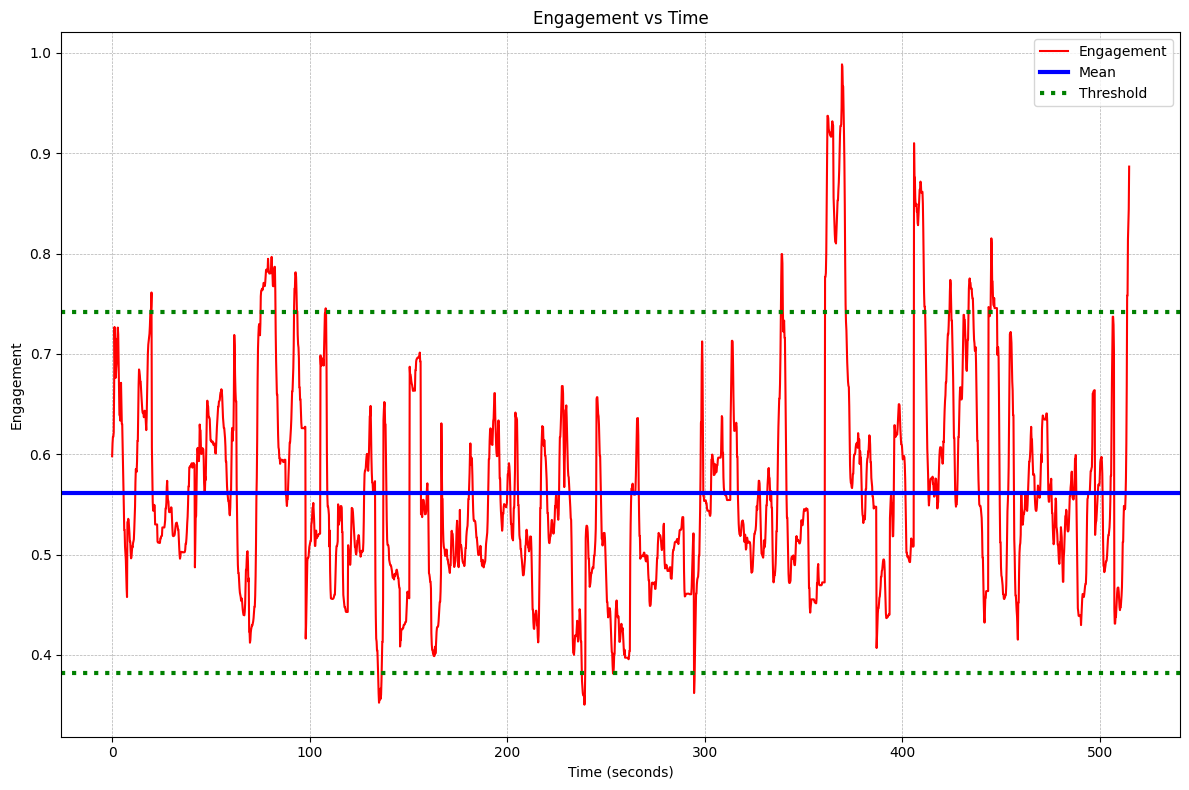

In [ ]:
plt.figure(figsize=(12,8))

baseline_mean = np.mean(engagement[0:index_diff_change[0]])
baseline_std = np.std(engagement[0:index_diff_change[0]])

plt.plot(timestamps, engagement, color = "r", label = "Engagement")
plt.axhline(y=baseline_mean, color = 'b', label="Mean", linewidth = 3)
plt.axhline(y=baseline_mean+2*baseline_std, color = 'g', linestyle = ':', linewidth=3, label="Threshold")
plt.axhline(y=baseline_mean-2*baseline_std, color = 'g', linestyle = ':', linewidth=3)

plt.title("Engagement vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Engagement")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

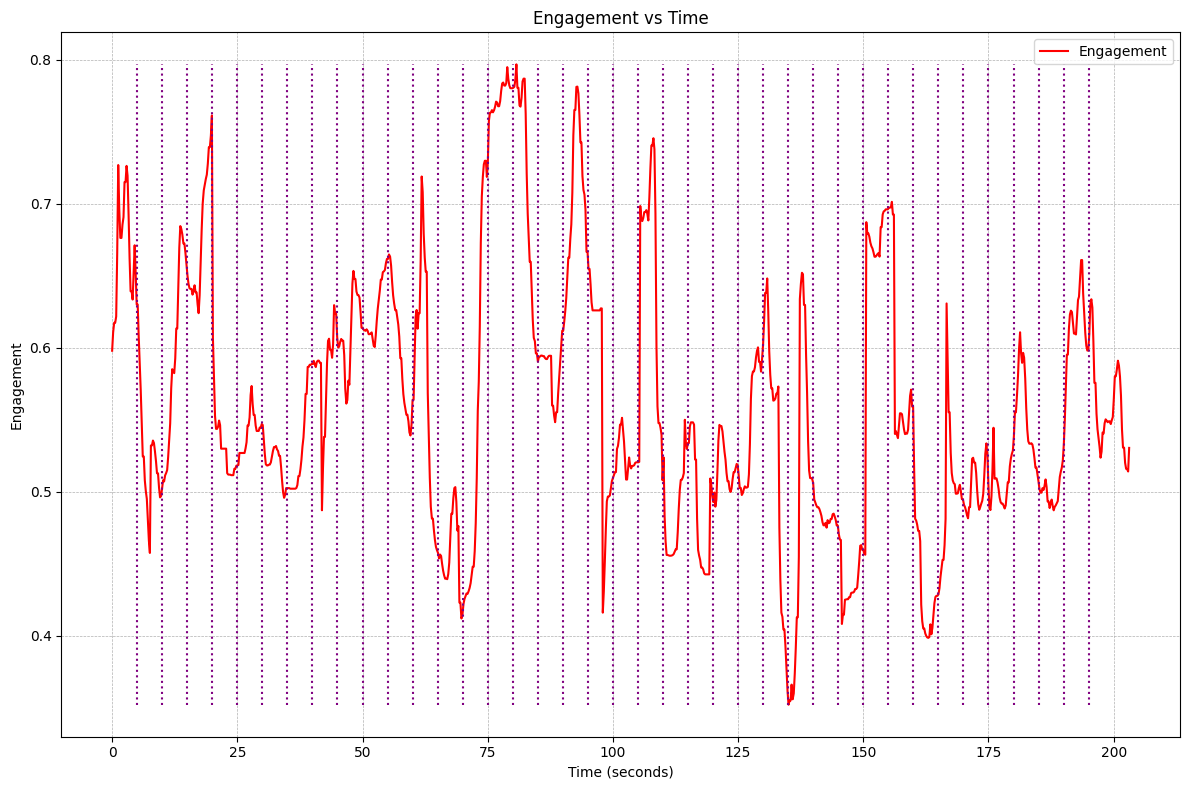

In [62]:
plt.figure(figsize=(12,8))

data = engagement[0:1000]
time = timestamps[0:1000]

baseline_mean = np.mean(data[0:index_diff_change[0]])
baseline_std = np.std(data[0:index_diff_change[0]])
fivesecbins = [5*i for i in range(1, int(np.max(time)/5))]

plt.plot(time, data, color = "r", label = "Engagement")
plt.vlines(x = fivesecbins, ymin = min(data), ymax = max(data),
           colors="purple", linestyle = ':', linewidth=1.5)

plt.title("Engagement vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Engagement")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()